In [18]:
'''Initial data processing and summarization.'''
import joblib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load and Filter Data
# We're only interested in trips to LaGuardia Airport,
# so we'll create a new dataset for just those rows.
# This reduces the dataset from ~450MB/19M rows to only ~10MB/420k rows.
# ---
# Data source: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page
# Title: "April 2024 High Volume For-Hire Vehicle Trip Records"
# Dataset URL: https://d37ci6vzurychx.cloudfront.net/trip-data/fhvhv_tripdata_2024-04.parquet
# ---

# File paths
input_file = 'fhvhv_tripdata_2024-04.parquet'
output_file = 'filtered.parquet'

# Read and filter for LGA as destination
raw = pd.read_parquet(input_file)
filtered_data = raw[raw['DOLocationID'] == 138]

# Trim features to the most relevant for trip cost
columns_to_keep = [
    'pickup_datetime', 'dropoff_datetime', 'PULocationID', 'DOLocationID',
    'trip_miles', 'trip_time', 'base_passenger_fare', 'tolls',
    'bcf', 'sales_tax', 'congestion_surcharge', 'airport_fee'
]
filtered_data = filtered_data[columns_to_keep]

# Save to new working dataset
filtered_data.to_parquet(output_file, index=False)

In [19]:
# Read and summarize our filtered data
data = pd.read_parquet(output_file)
print(data.head())
print(data.info())
print(data.describe())

      pickup_datetime    dropoff_datetime  PULocationID  DOLocationID  \
0 2024-04-01 00:29:01 2024-04-01 00:38:03           260           138   
1 2024-04-01 00:11:48 2024-04-01 00:29:30           198           138   
2 2024-04-01 00:24:12 2024-04-01 00:51:02           230           138   
3 2024-04-01 00:11:58 2024-04-01 00:20:36            70           138   
4 2024-04-01 00:48:15 2024-04-01 01:27:23           209           138   

   trip_miles  trip_time  base_passenger_fare  tolls   bcf  sales_tax  \
0       2.010        542                 9.20    0.0  0.32       1.04   
1      10.487       1062                44.87    0.0  1.30       4.20   
2       8.430       1610                32.45    0.0  0.96       3.10   
3       1.710        518                 7.35    0.0  0.27       0.87   
4      15.030       2348                30.04    0.0  0.86       2.78   

   congestion_surcharge  airport_fee  
0                  0.00         2.50  
1                  0.00         2.50  
2    

In [20]:
# Clean Data
# No changes in row count after these operations, so not needed.
# data.dropna(inplace=True)
# data.drop_duplicates(inplace=True)

# Transform Data
# Bin datetimes by hour of day
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime']).dt.hour
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime']).dt.hour
# Replace locations with dummy variables
data = pd.get_dummies(data, columns=['PULocationID','DOLocationID'])

# Sanity Check
print(data.head())
print(data.info())

   pickup_datetime  dropoff_datetime  trip_miles  trip_time  \
0                0                 0       2.010        542   
1                0                 0      10.487       1062   
2                0                 0       8.430       1610   
3                0                 0       1.710        518   
4                0                 1      15.030       2348   

   base_passenger_fare  tolls   bcf  sales_tax  congestion_surcharge  \
0                 9.20    0.0  0.32       1.04                  0.00   
1                44.87    0.0  1.30       4.20                  0.00   
2                32.45    0.0  0.96       3.10                  2.75   
3                 7.35    0.0  0.27       0.87                  0.00   
4                30.04    0.0  0.86       2.78                  0.75   

   airport_fee  ...  PULocationID_256  PULocationID_257  PULocationID_258  \
0         2.50  ...             False             False             False   
1         2.50  ...             Fa

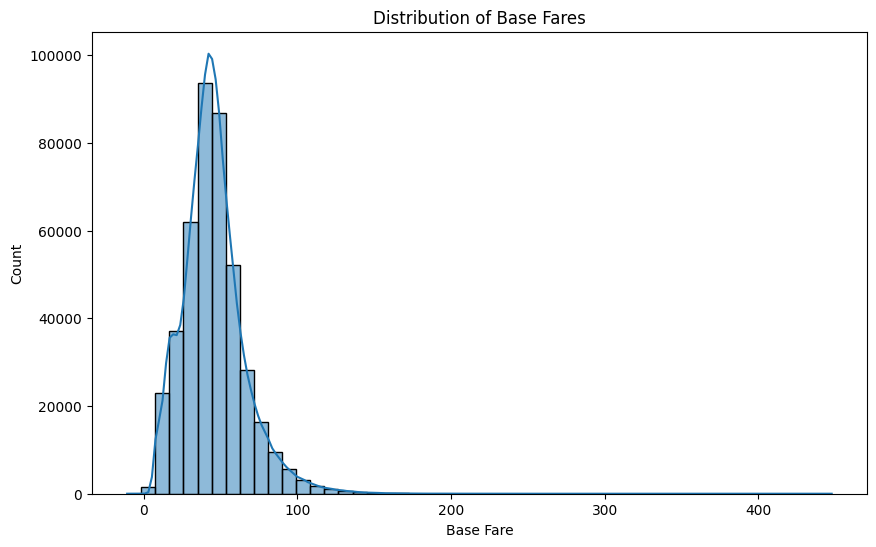

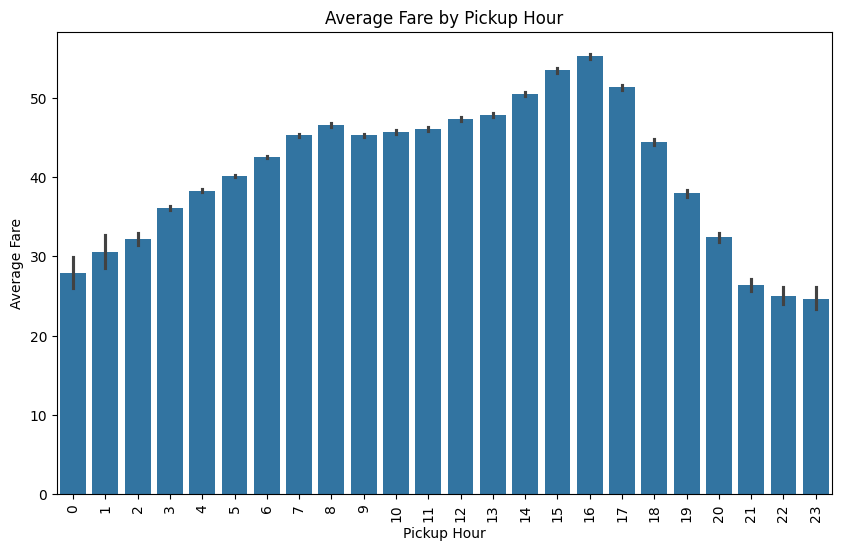

In [24]:
# TODO Visualize Data
# Distribution of base fares
# Notable: very, very long tail
plt.figure(figsize=(10,6))
sns.histplot(data['base_passenger_fare'], bins=50, kde=True)
plt.title('Distribution of Base Fares')
plt.xlabel('Base Fare')
plt.ylabel('Count')
plt.show()
# Seeing a very very long tail!

# Average fare by pickup hour
# Notable: greater variance at night
plt.figure(figsize=(10,6))
sns.barplot(x='pickup_datetime', y='base_passenger_fare', data=data)
plt.title('Average Fare by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Average Fare')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# TODO: Train the model
#rf = RandomForestRegressor(random_state=1)
#rt.fit(X_train, y_train)

# Save the model
# joblib.dump(rf, 'model.pkl')

NameError: name 'rt' is not defined